In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
train = pd.read_csv('titanic_data.csv')
test = pd.read_csv('titanic_data.csv')

In [193]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [194]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [195]:
test.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

DATA VISUALISATION

Percentage of Women who Survived: 74.20382165605095
Percentage of Men who Survived: 18.890814558058924


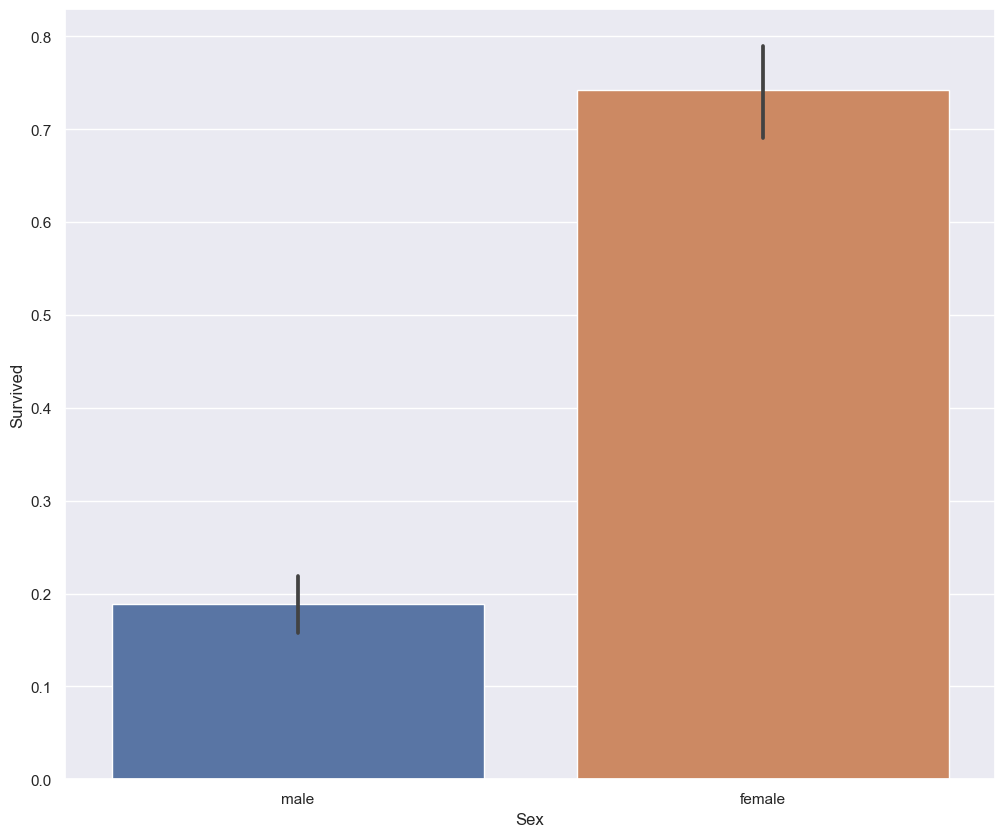

In [196]:
sns.barplot(x='Sex',y='Survived',data=train)
print('Percentage of Women who Survived:', train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)[1]*100)
print('Percentage of Men who Survived:', train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)[1]*100)

PClass

Percentage of Pclass = 1 who Survived: 62.96296296296296
Percentage of Pclass = 2 who Survived: 47.28260869565217
Percentage of Pclass = 3 who Survived: 24.236252545824847


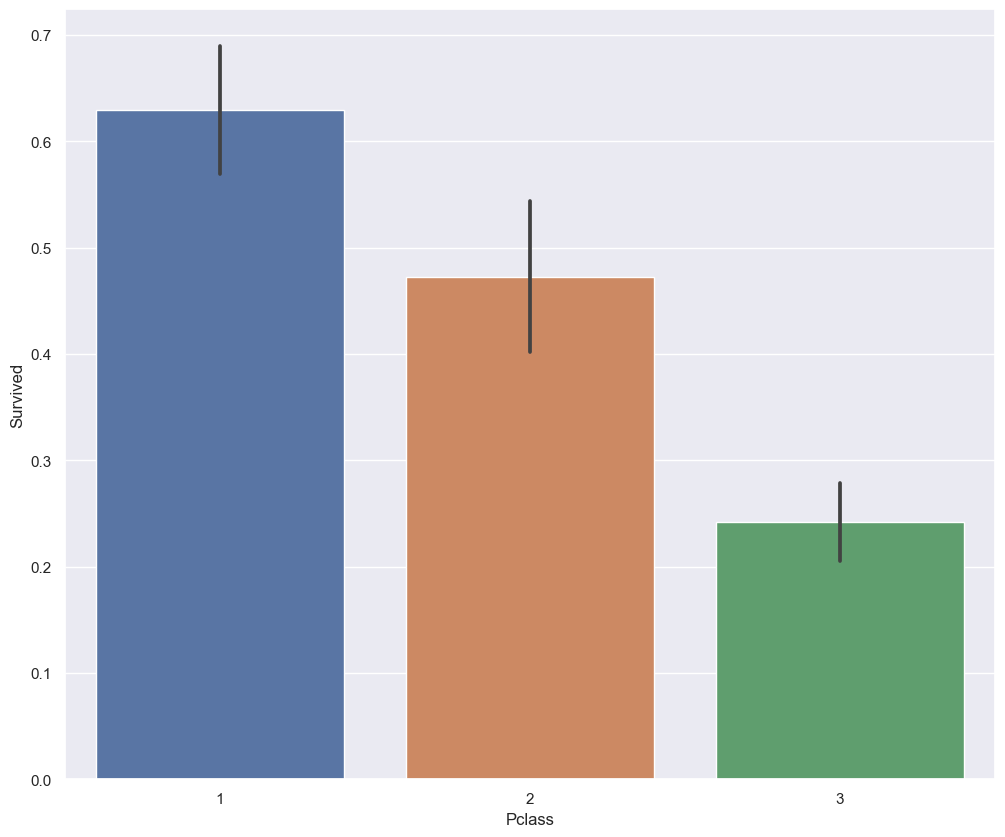

In [197]:
sns.barplot(x='Pclass',y='Survived',data = train)
print('Percentage of Pclass = 1 who Survived:', train['Survived'][train['Pclass'] == 1].value_counts(normalize = True)[1]*100)
print('Percentage of Pclass = 2 who Survived:', train['Survived'][train['Pclass'] == 2].value_counts(normalize = True)[1]*100)
print('Percentage of Pclass = 3 who Survived:', train['Survived'][train['Pclass'] == 3].value_counts(normalize = True)[1]*100)

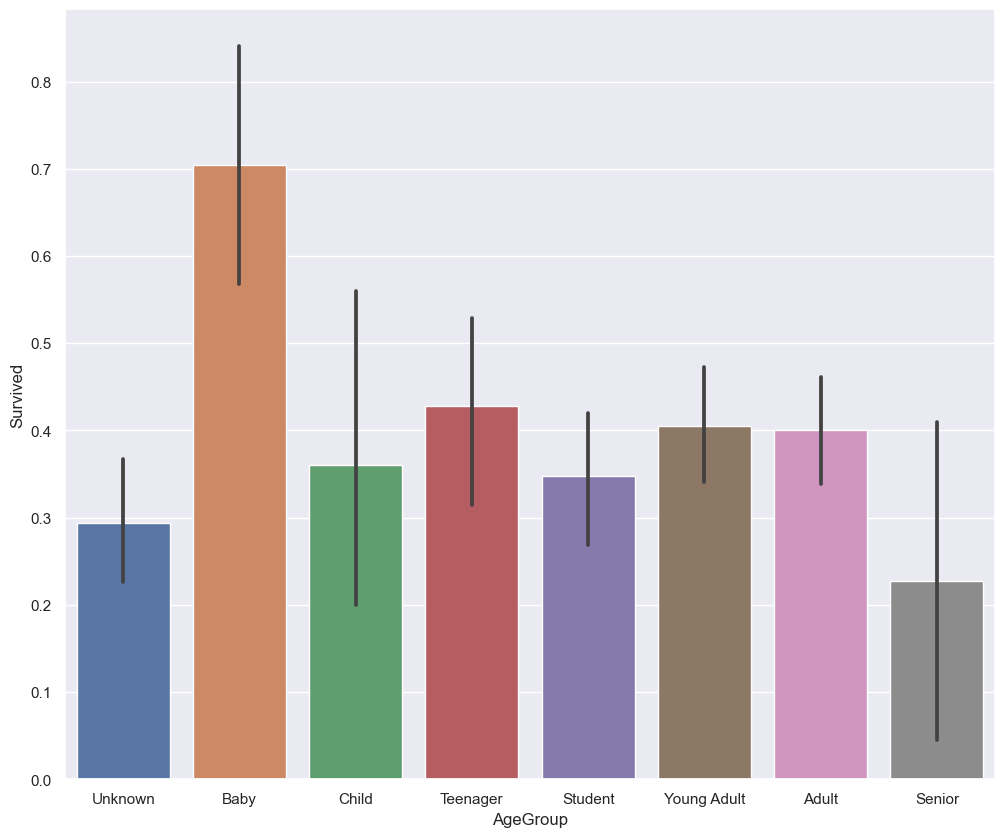

In [198]:
train.Age = train.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]

labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train['Age'],bins,labels = labels)
test['AgeGroup'] = pd.cut(test['Age'],bins,labels = labels)

sns.barplot(x = 'AgeGroup', y='Survived', data = train)
plt.show()

In [199]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [200]:
train = train.drop(['Ticket','Cabin','Fare'],axis=1)
test = test.drop(['Ticket','Cabin','Fare'],axis=1)

Dealing with Missing Values

In [201]:
print('Number of people embarking in Southhampton (S) : ')
southampton = train[train['Embarked'] == 'S'].shape[0]
print(southampton)

Number of people embarking in Southhampton (S) : 
644


In [202]:
print('Number of people embarking in Cherbourg (C) : ')
cher = train[train['Embarked'] == 'C'].shape[0]
print(cher)

Number of people embarking in Cherbourg (C) : 
168


In [203]:
print('Number of people embarking in Queenstown (Q) : ')
queen = train[train['Embarked'] == 'Q'].shape[0]
print(queen)

Number of people embarking in Queenstown (Q) : 
77


In [204]:
train = train.fillna({'Embarked' : 'S'})

In [205]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
AgeGroup       0
dtype: int64

In [206]:
combine = [train,test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False)

pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [207]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs') 
    
train[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [208]:
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Royal':5,'Rare':6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adult,1


In [209]:
mr_age = train[train['Title'] == 1]['AgeGroup'].mode() #young adult
miss_age = train[train['Title'] == 2]['AgeGroup'].mode() #student
mrs_age = train[train['Title'] == 3]['AgeGroup'].mode() #adult
master_age = train[train['Title'] == 4]['AgeGroup'].mode() #babyy
royal_age = train[train['Title'] == 5]['AgeGroup'].mode() #adult
rare_age = train[train['Title'] == 6]['AgeGroup'].mode() #adult

age_title_map = {1 : 'Young Adult',2 : 'Student',3 : 'Adult',4 : 'Baby',5 : 'Adult',6 : 'Adult'}

for i in range(len(train['AgeGroup'])):
    if train['AgeGroup'][i] == 'Unknown':
        train['AgeGroup'][i] = age_title_map[train['Title'][i]]
        
for i in range(len(test['AgeGroup'])):
    if test['AgeGroup'][i] == 'Unknown':
        test['AgeGroup'][i] = age_title_map[train['Title'][i]]

In [217]:
from sklearn.preprocessing import LabelEncoder
transform = ['Sex', 'AgeGroup', 'Embarked']

for i in transform:
    le = LabelEncoder()
    train[i] = le.fit_transform(train[i])

In [220]:
for i in transform:
    le = LabelEncoder()
    test[i] = le.fit_transform(test[i])

In [222]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,4,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,6,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,6,1


Machine Learning Model

In [231]:
X_train = train.drop(['PassengerId','Name','Survived'], axis=1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId','Name'],axis=1)

In [237]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
preds = lr.predict(X_train)

In [235]:
preds

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [240]:
ids = test['PassengerId']

output = pd.DataFrame({'PassengerId' : ids, 'Survived': preds})
output.to_csv('submission.csv',index = False)